In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical as to_cat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
# y_train = to_cat(y_train)
# y_test =  to_cat(y_test)

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
x_train  =  x_train / 255.0
x_test =  x_test / 255.0


In [6]:
# UNIQUE LABELS 
# np.unique(y_train)  #array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


In [7]:
x_train.shape

(60000, 28, 28)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
    
    
    
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
784*64+64, 64*128+128, 128*10+10

(50240, 8320, 1290)

In [12]:
history  = model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5011 - acc: 0.8238 - val_loss: 0.4043 - val_acc: 0.8532
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3747 - acc: 0.8647 - val_loss: 0.3774 - val_acc: 0.8629
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3369 - acc: 0.8768 - val_loss: 0.3435 - val_acc: 0.8775
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3093 - acc: 0.8851 - val_loss: 0.3343 - val_acc: 0.8793
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2910 - acc: 0.8921 - val_loss: 0.3458 - val_acc: 0.8720


In [13]:
loss,acc = model.evaluate(x_test,y_test)
acc

313/313 [==============================] - 0s 1ms/step - loss: 0.3629 - acc: 0.8672


0.8672000169754028

### MODEL GRAPHS

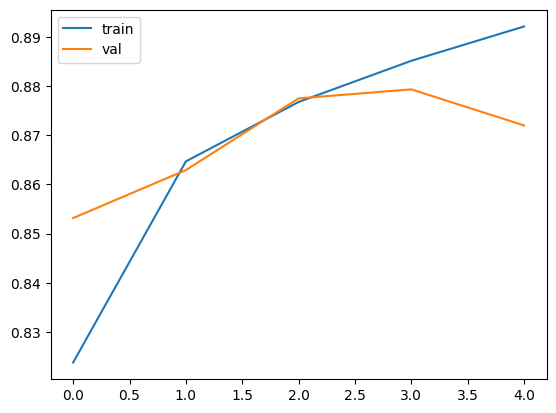

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["train","val"],loc='upper left')

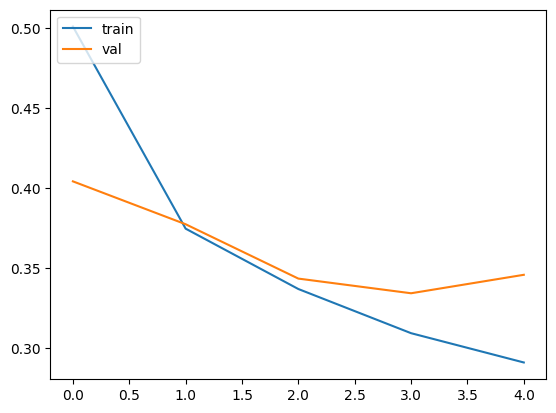

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

### MAKING PREDICTIONS 

In [32]:
labels = ['top', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']



def predict(N): 
    label_true =  labels[y_test[N]]
    sample =  x_test[N]
    pred =  labels[np.argmax(model.predict(sample.reshape(-1,28,28))) ] ## just resshape to -1,28,28 for prediction purpose 
    return (pred,label_true)

N=  45
sample=  x_test[N]
label_true,pred =  predict(N)

1/1 [==============================] - 0s 25ms/step


In [17]:
 ##### SOURCE :  AI AND ML FOR CODERS CHAPTER 2    and geeks for geeks [same code]

Text(0.5, 0, 'TRUE : sneaker  PRED : sneaker')

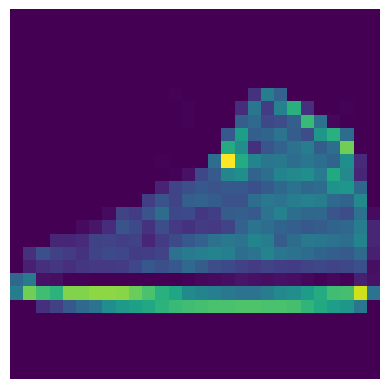

In [33]:
plt.imshow(sample,interpolation="nearest")
plt.axis("off")
plt.xlabel(f"TRUE : {label_true}  PRED : {pred}")

In [19]:
### NOTE DOWN 
### SPARSE_CATEGORICAL ENTROPY ✔   TO CATEGORICAL ❌ why ?  sparse ->  integer based not matrix based 
### CATEGORICAL ENTROPY ✔  TO CATEGORICAL   ✔

In [34]:
### ACCURACY GOOD YOU CAN USE IT 
# 😊😊